In [1]:
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
import math
import numpy as np

In [2]:
#We are using yfinance to import data for the S&P500 ticker. From 1983-01-2022-09. We are converting the data into a dataframe.
#We have removed some unnecessary cols like volume, dividend, etc and we he have saved the file to a CSV so we don't have to keep
#calling yahoo api.
snp500 = yf.Ticker('^GSPC')
data = snp500.history(start='1983-01-01', end='2022-09-14')
df = pd.DataFrame(data)
df = df.drop(df.columns[[1,2,4,5,6]], axis=1)
df.to_csv('unediteddata.csv', index=True)

In [3]:
#Opening CSV, addind a new col called weekday that adds day of the week. Converted date col to %Y-%m-%d. We dropped any day
#that is not a monday or friday.(0 is monday, 4 is friday).
df = pd.read_csv('unediteddata.csv')
df["weekday"] = pd.to_datetime(df.Date,utc=True).dt.dayofweek
df["Date"] = pd.to_datetime(df.Date,utc=True).dt.strftime('%Y-%m-%d')
df =df.drop(df[(df.weekday != 0) & (df.weekday != 4)].index)
df.to_csv('editeddata.csv', index=False)
df = pd.read_csv('editeddata.csv')

In [4]:
#We label each day red or green based on the open/close values.
for index, row in df.iterrows():
    if df.at[index, 'Open'] > df.at[index, 'Close']:
        df.at[index, 'DayColor'] = 'Red'
    elif df.at[index, 'Open'] < df.at[index, 'Close']:
        df.at[index, 'DayColor'] = 'Green'
    else:
        df.at[index, 'DayColor'] = 'Equal'

In [5]:
#We drop any weekend that is a long weekend. For example, there is a friday trading day but no monday, 
#we dropped the whole week.

x = 1
for index, row in df.iterrows():
    if df.at[index, 'weekday'] == x:
        if df.at[index, 'weekday'] == 0:
            df.drop(index - 1, inplace=True)
        else:
            df.drop(index, inplace=True)
    else:
        x = df.at[index, 'weekday']



#We initialized variables for each possibility. For example, (Red,Red) which would be friday red, monday red.

gg = 0
gr = 0
rg = 0
rr = 0
eg = 0
er = 0
re = 0
ge = 0
ee = 0
df.to_csv('editeddata.csv', index=False)
df = pd.read_csv('editeddata.csv')


#We looked for cases that matched the varaibles initialized above.

for index, row in df.iterrows():
    if index == 0:
        index = 1
    elif df.at[index, 'weekday'] == 0:
        if df.at[index - 1, 'DayColor'] == 'Red' and df.at[index, 'DayColor'] == 'Red':
            rr += 1
        elif df.at[index - 1, 'DayColor'] == 'Green' and df.at[index, 'DayColor'] == 'Red':
            gr += 1
        elif df.at[index - 1, 'DayColor'] == 'Green' and df.at[index, 'DayColor'] == 'Green':
            gg += 1
        elif df.at[index - 1, 'DayColor'] == 'Red' and df.at[index, 'DayColor'] == 'Green':
            rg += 1
        elif df.at[index - 1, 'DayColor'] == 'Equal' and df.at[index, 'DayColor'] == 'Green':
            eg += 1
        elif df.at[index - 1, 'DayColor'] == 'Equal' and df.at[index, 'DayColor'] == 'Red':
            er += 1
        elif df.at[index - 1, 'DayColor'] == 'Red' and df.at[index, 'DayColor'] == 'Equal':
            re += 1
        elif df.at[index - 1, 'DayColor'] == 'Green' and df.at[index, 'DayColor'] == 'Equal':
            ge += 1
        elif df.at[index - 1, 'DayColor'] == 'Equal' and df.at[index, 'DayColor'] == 'Equal':
            ee += 1
equal=0
red=0
green=0

#In this forloop, we just counted the number of reds, greens and equals on a friday.
for index, row in df.iterrows():
    if df.at[index, 'DayColor'] == 'Equal':
        equal +=1
    elif df.at[index, 'DayColor'] == 'Red':
        red +=1
    elif df.at[index, 'DayColor'] == 'Green':
        green +=1

print(f"rr = {rr}\nrg = {rg}\ngg = {gg}\ngr = {gr}\nee = {ee}\neg = {eg}\nge = {ge}\nre = {re}\ner = {er}")
print(len(df.index)/2)

rr = 380
rg = 443
gg = 518
gr = 474
ee = 0
eg = 0
ge = 2
re = 2
er = 0
1819.5


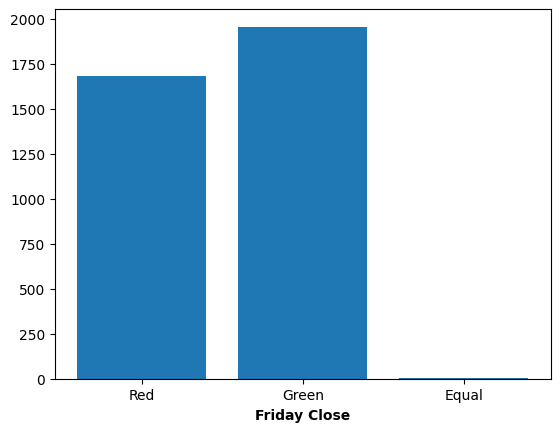

In [6]:
#Using matplot to plot Friday Closes. Only 4 days are equal.
%matplotlib inline
labels = ['Red','Green','Equal']
values =[red,green,equal]
y_pos = np.arange(len(labels))
plt.bar(y_pos, values)
plt.xticks(y_pos, labels)
plt.xlabel('Friday Close', fontweight='bold')
plt.show()

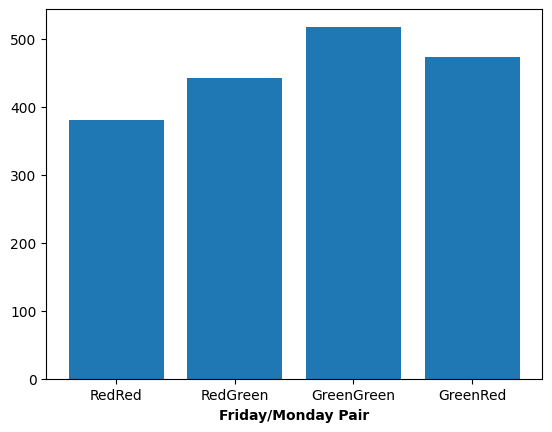

In [7]:
#Plot the Friday/Monday Pairs.
labels = ['RedRed','RedGreen','GreenGreen','GreenRed']
values =[rr,rg,gg,gr]
y_pos = np.arange(len(labels))
plt.bar(y_pos, values)
plt.xticks(y_pos, labels)
plt.xlabel('Friday/Monday Pair', fontweight='bold')
plt.show()

In [8]:
probRR = rr/(rr+rg) * 100 
probRG = rg/(rr+rg) * 100 
probGG = gg/(gg + gr) * 100 
probGR = gr/(gg + gr) * 100

print(probRR)
print(probRG)
print(probGG)
print(probGR)

46.172539489671934
53.82746051032807
52.21774193548387
47.78225806451613


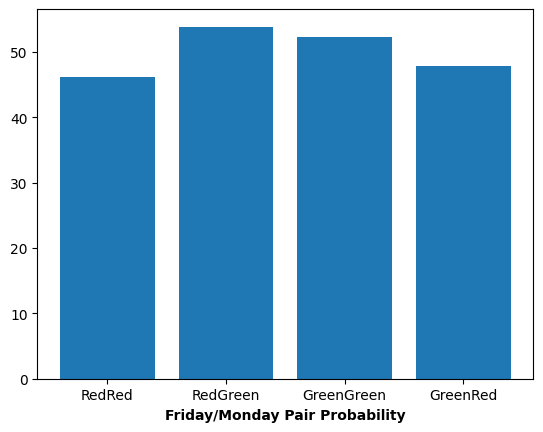

In [9]:
#Plot the Friday/Monday Pairs.
labels = ['RedRed','RedGreen','GreenGreen','GreenRed']
values =[probRR,probRG,probGG,probGR]
y_pos = np.arange(len(labels))
plt.bar(y_pos, values)
plt.xticks(y_pos, labels)
plt.xlabel('Friday/Monday Pair Probability', fontweight='bold')
plt.show()